In [10]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from joblib import dump, load
from sklearn.tree import plot_tree

In [11]:
df = pd.read_csv('../global_preprocessed_without_onehot_and_norm.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]
df

,iyear,extended,region,nkill,nwound,attacktype1,nperps,suicide,success,gname,individual,targtype1
0,1970,0,2,1.0,0.0,1,0.0,0,1,0,0,14
1,1970,0,1,0.0,0.0,6,7.0,0,1,1,0,7
2,1970,0,5,1.0,0.0,1,0.0,0,1,2,0,10
3,1970,0,8,0.0,0.0,3,0.0,0,1,2,0,7
4,1970,0,4,0.0,0.0,7,0.0,0,1,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
171275,2017,0,11,1.0,2.0,2,1.0,0,1,2656,0,4
171276,2017,0,10,2.0,7.0,3,1.0,0,1,592,0,4
171277,2017,0,5,0.0,0.0,7,1.0,0,1,2926,0,14
171278,2017,0,6,0.0,0.0,3,1.0,0,0,2,0,2


In [12]:
model = load("random_forest_model.joblib")

In [13]:
x = df.drop("extended", axis=1)
y = df['extended']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

/home/gleb/miniconda3/envs/rapids-23.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

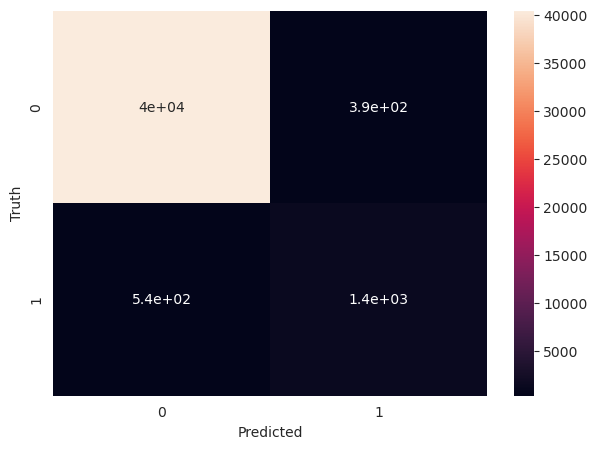

In [14]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [15]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
x_test = x_test.drop("Predicted", axis=1)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     40832
           1       0.79      0.73      0.76      1988

    accuracy                           0.98     42820
   macro avg       0.89      0.86      0.87     42820
weighted avg       0.98      0.98      0.98     42820


Variable: attacktype1          Importance: 0.62
Variable: iyear                Importance: 0.09
Variable: gname                Importance: 0.08
Variable: nkill                Importance: 0.05
Variable: targtype1            Importance: 0.05
Variable: region               Importance: 0.04
Variable: nperps               Importance: 0.03
Variable: nwound               Importance: 0.02
Variable: success              Importance: 0.02
Variable: suicide              Importance: 0.0
Variable: individual           Importance: 0.0


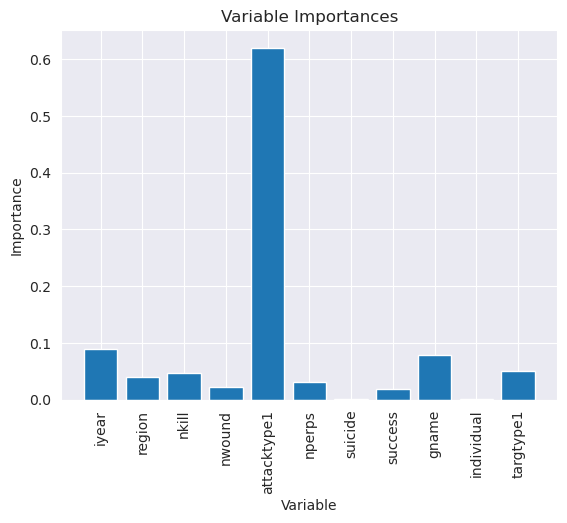

In [17]:
# Get numerical feature importances
importances = model.feature_importances_

# Get the name of the features
feature_list = list(x.columns)

# List of tuples with variable and importance
feature_importance= [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importance = sorted(feature_importance, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importance]

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()